In [61]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [62]:
data_train = pd.read_csv('/content/raw_sales.csv')
data_train.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [63]:
data_train.rename(columns={'datesold':'datesale'}, inplace=True)
data_train.head()

,datesale,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [64]:
data_train['datesale'] = pd.to_datetime(data_train['datesale'])
data_train.head()

,datesale,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [65]:
data_train.isnull().sum()

datesale        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [66]:
data_train.set_index('datesale', inplace=True)

In [67]:
data_train.head()

,postcode,price,propertyType,bedrooms
datesale,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [68]:
data_train2 = data_train.resample('M').mean()
data_train2.head(20)

,postcode,price,bedrooms
datesale,,,
2007-02-28,2756.500000,407500.000000,3.500000
2007-03-31,2905.333333,339333.333333,3.333333
2007-04-30,2706.000000,798000.000000,3.666667
2007-05-31,2904.000000,339500.000000,3.000000
2007-06-30,2757.500000,520333.333333,3.333333
2007-07-31,2668.684211,592078.947368,3.263158
2007-08-31,2775.869565,505608.695652,3.391304
2007-09-30,2681.950000,556875.000000,3.300000
2007-10-31,2743.500000,498600.000000,3.300000


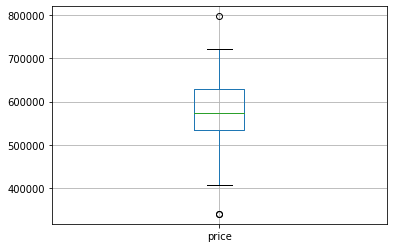

In [70]:
data_train2.loc[:,['price']].boxplot()

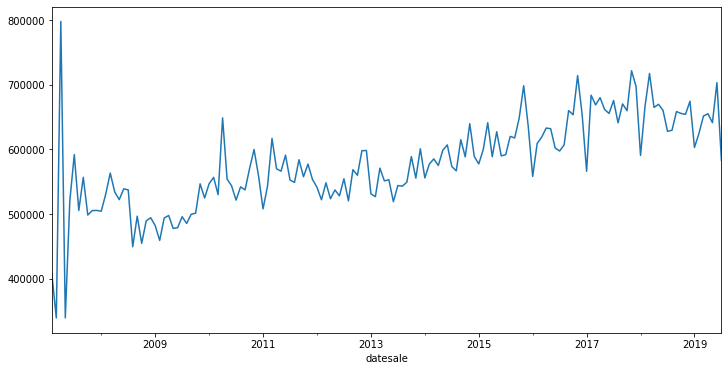

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
data_train2['price'].plot()
plt.show()

# dates = data_train['date'].values
# cases = data_train['cases'].values
# deaths = data_train['deaths'].values

# plt.figure(figsize=(15, 15))
# plt.plot(dates, cases)
# plt.title(
#     'Usage average',
#     fontsize=20,
# )

In [72]:
# def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
#   series = tf.expand_dims(series, axis = -1)
#   ds = tf.data.Dataset.from_tensor_slices(series)
#   ds = ds.window(window_size + 1, shift = 1, drop_remainder = True)
#   ds = ds.flat_map(lambda w: w.batch(window_size + 1))
#   ds = ds.shuffle(shuffle_buffer)
#   ds = ds.map(lambda w: (w[:-1], w[-1:]))
#   return ds.batch(batch_size).prefetch(1)

for n in data_train2['price']:
    if n > data_train2['price'].mean() + np.std(data_train2['price'])*2 or n < data_train2['price'].mean() - np.std(data_train2['price'])*2:
        data_train2[data_train2 == n] = data_train2['price'].mean()

In [73]:
for n in data_train2['price']:
    if n > data_train2['price'].mean() + np.std(data_train2['price'])*2 or n < data_train2['price'].mean() - np.std(data_train2['price'])*2:
        print(n)

698680.5721393034


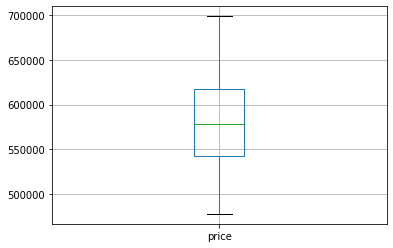

In [74]:
data_train2.loc[:,['price']].boxplot()

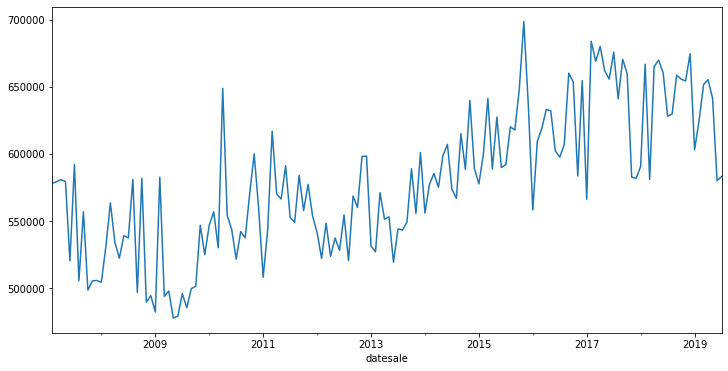

In [75]:
fig, ax = plt.subplots(figsize=(12,6))
data_train2['price'].plot()
plt.show()

In [76]:
print("value:", adfuller(data_train2['price'])[0],
     "p-value:", adfuller(data_train2['price'])[1],
     "conf:", adfuller(data_train2['price'])[4])

value: -0.9647364484957991 p-value: 0.7659076765447863 conf: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


In [77]:
data_train2 = data_train2.diff()
data_train2.dropna(inplace=True)
print("value:", adfuller(data_train2['price'])[0],
     "p-value:", adfuller(data_train2['price'])[1],
     "conf:", adfuller(data_train2['price'])[4])

value: -6.122559234641568 p-value: 8.783799060237963e-08 conf: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


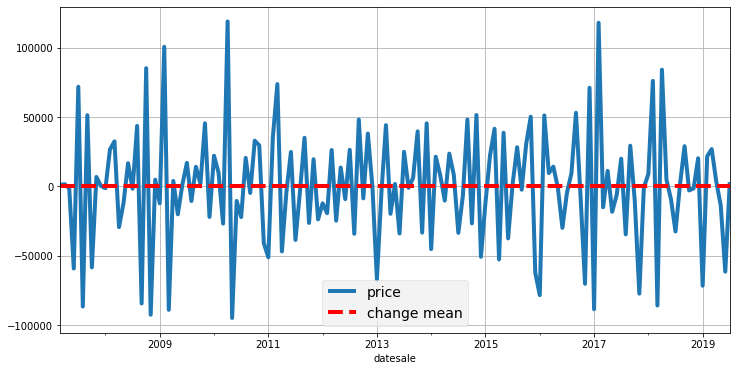

In [78]:
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')
data_train2['price'].plot()
plt.axhline(y=data_train2['price'].mean(), color='red', ls='--', label='change mean')
plt.legend()
plt.show()

In [88]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [89]:
train_set = windowed_dataset(data_train2, window_size = 60, batch_size = 100, shuffle_buffer = 1000)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences = True),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [90]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1.0000e-04, momentum = 0.9)

num_epochs = 50

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])
history = model.fit(train_set,
                    epochs=num_epochs)

Epoch 1/50


ValueError: ignored